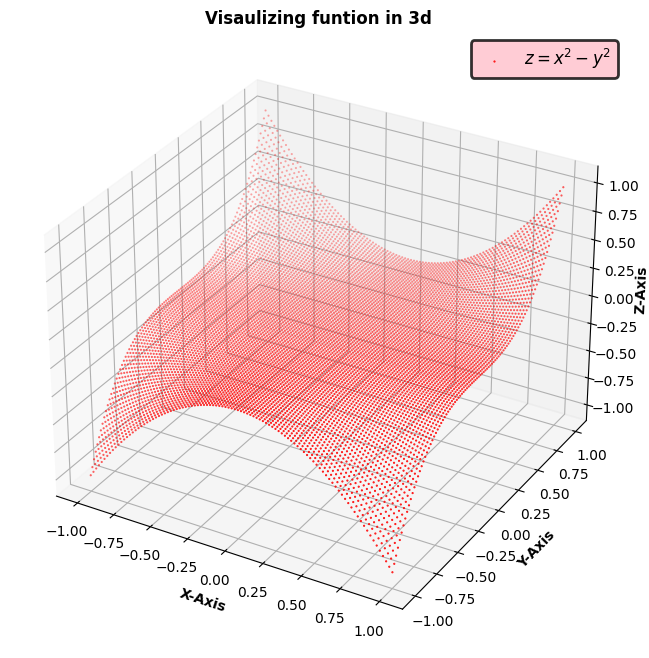

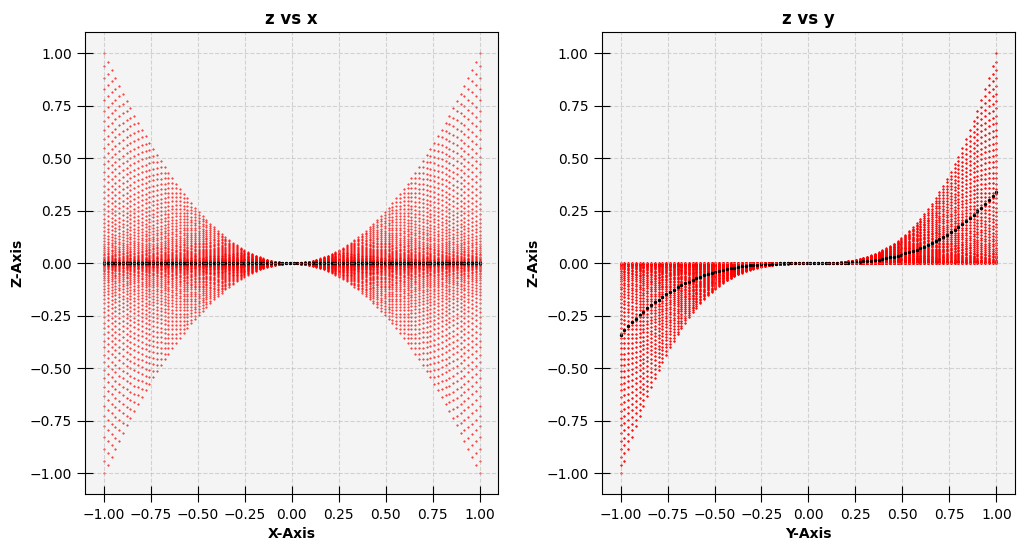

In [128]:
import numpy as np
import matplotlib.pyplot as plt

# defining the function
def myfunc(x,y):
    #z= x*y**2
    z=x**2*y**3
    return z

#Setting the domain
xll,xul = [-1,1]
yll,yul = [-1,1]

# number of points required in each direction
nx,ny=[100,100]

# Obtaining points
x_points,y_points = [np.linspace (xll,xul,nx),np.linspace(yll,yul,ny)]
x_mesh,y_mesh = np.meshgrid(x_points,y_points)
x_cor = x_mesh.reshape(-1,1)
y_cor = y_mesh.reshape(-1,1)
xy_cor = np.hstack([x_cor,y_cor])
z_cor = myfunc(x_cor,y_cor)

# Obtaining the mean functions
## Finding the z mean corresponding to a given x
z_mean_x = np.zeros(nx)
count=0
for x_point in x_points:
    i = np.where(x_cor[:,0]== x_point)
    z_mean_x[count] = np.mean(z_cor[i])
    count=count+1

## Finding the z mean corresponding to a given y
z_mean_y = np.zeros(ny)
count=0
for y_point in y_points:
    i = np.where(y_cor[:,0]== y_point)
    z_mean_y[count] = np.mean(z_cor[i])
    count=count+1
    
# Visializing in 3d
fig = plt.figure(figsize=[10,8])
axs = fig.add_subplot(111,projection = "3d")
axs.set_xlabel("X-Axis",fontweight="bold")
axs.set_ylabel("Y-Axis",fontweight="bold")
axs.set_zlabel("Z-Axis",fontweight="bold",labelpad=1)
axs.set_title("Visaulizing funtion in 3d", fontweight="bold")
axs.tick_params(labelsize=10)
axs.scatter(x_cor,y_cor, z_cor, s = 0.3,c="r",label="$z=x^2-y^2$")
legend = axs.legend(loc="best", facecolor="pink", edgecolor="k", fontsize=12)
frame= legend.get_frame()
frame.set_linewidth(2)
frame.set_edgecolor("black")
plt.show()

# Visualise in 2d along x-axis
fig,axs = plt.subplots(1,2,figsize=[12,6])
axs[0].scatter(x_cor,z_cor,s=0.2,c="r")
axs[0].scatter(x_points,z_mean_x,s=2,c="k")
axs[1].scatter(y_cor,z_cor,s=0.2,c="r")
axs[1].scatter(x_points,z_mean_y,s=2,c="k")
axs[0].set_title("z vs x",fontweight="bold")
axs[1].set_title("z vs y",fontweight="bold")
axs[0].set_xlabel("X-Axis",fontweight="bold")
axs[1].set_xlabel("Y-Axis",fontweight="bold")
for i in [0,1]:
    axs[i].set_ylabel("Z-Axis", fontweight="bold")
    axs[i].tick_params(size=12,direction="inout")
    axs[i].set_facecolor("#f4f4f4")
    axs[i].grid(True,linestyle="--",alpha=0.5)
    for spine_value in axs[i].spines.keys():
        axs[i].spines[spine_value].set_edgewidth=2
plt.subplots_adjust(wspace=0.25)
